# >Project Title: Exploring YOLO’s accuracy on reduced Rareplanes dataset<

## Project focuses on exploring Yolo Architectures v5, v8, and v11 on a sample size of Rareplanes real version dataset. To make the processing easier and because of time, the dataset will be reduced to 8% of the original size (107Gb of Real Version reduced to -> 8.56Gb). No training will be executed, we will only focus on testing the accuracies of the models upon this sample to compare how progression between models have come so far until now.

## We will divide the sections by four steps, each with their own sub-steps:
1) Retrieve the Models  from the Yolo Architecture GitHub
2) Download the Real Version Rareplanes dataset, subset the data amount of interest, and retrieve model weights
3) Set-up the environment with necessary packages to run the Yolo Architecture and handle project complexity
4) Set-up model parameters in Python Environment 
5) Test v5, v8, v11 on data for accuracy
6) Compare model outputs
7) Convert to scripts [Optional]

#### *REMINDER*: To access commands for bash/python actions, uncomment them!!

#### Step 1: Retrieve Yolo Models from Official Source:

In [ ]:
#### The Yolo GITHUB has been retrieved by the following commands:

##   1) pip install ultralytics
##   2) git clone https://github.com/ultralytics/ultralytics

#### This install all dependencies required to run YOLO models and the documents to support manual or automatic runs depending on models


#### Step 2: Download Rareplanes Dataset, real version, and susbet to 8% of its totality.

In [ ]:
#### To download the files, we need to first access the AWS repository via no client request due to not having an account
#### This affirms that we can retrieve the files directly to the real data set plus the weights and needed files
#### The files required are:

##   1) RealDataSet
##   2) Weights
##   3) Train/Test Tiles 

#### Although the train/test tiles are downloaded, we will use the test for accuracy testing with the three models as stated for project guidelines

#### The downloads were managed by the following commands:

##   1) For TRAIN Tiles -> aws s3 cp --no-sign-request s3://rareplanes-public/real/tarballs/train/RarePlanes_train_geojson_aircraft_tiled.tar.gz .
##                      -> aws s3 cp --no-sign-request s3://rareplanes-public/real/tarballs/train/RarePlanes_train_PS-RGB_tiled.tar.gz . 

##   2) For TEST Tiles -> aws s3 cp --no-sign-request s3://rareplanes-public/real/tarballs/test/RarePlanes_test_geojson_aircraft_tiled.tar.gz .
##                     -> aws s3 cp --no-sign-request s3://rareplanes-public/real/tarballs/test/RarePlanes_test_PS-RGB_tiled.tar.gz .

##   3) For RealData Files -> aws s3 cp --recursive --no-sign-request s3://rareplanes-public/real/tarballs/ .

##   4) For Model Weights -> aws s3 cp --recursive --no-sign-request s3://rareplanes-public/weights/ .


#### Step 3: Set up the environment 

In [ ]:
#### We have downloaded the following packages and set the conda environment to work with the YOLO/Ultralytics GitHub contents:

#### CONDA ENV "YOLOPR_v1":
'''
Name                    Version                   Build  Channel
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
ca-certificates           2024.9.24            hca03da5_0  
certifi                   2024.8.30                pypi_0    pypi
charset-normalizer        3.4.0                    pypi_0    pypi
comm                      0.2.2              pyhd8ed1ab_0    conda-forge
contourpy                 1.3.0                    pypi_0    pypi
cycler                    0.12.1                   pypi_0    pypi
debugpy                   1.6.7            py39h313beb8_0  
decorator                 5.1.1              pyhd8ed1ab_0    conda-forge
exceptiongroup            1.2.2              pyhd8ed1ab_0    conda-forge
executing                 2.1.0              pyhd8ed1ab_0    conda-forge
filelock                  3.16.1                   pypi_0    pypi
fonttools                 4.54.1                   pypi_0    pypi
fsspec                    2024.10.0                pypi_0    pypi
idna                      3.10                     pypi_0    pypi
importlib-metadata        8.5.0              pyha770c72_0    conda-forge
importlib-resources       6.4.5                    pypi_0    pypi
ipykernel                 6.29.5             pyh57ce528_0    conda-forge
ipython                   8.18.1             pyh707e725_3    conda-forge
jedi                      0.19.2             pyhff2d567_0    conda-forge
jinja2                    3.1.4                    pypi_0    pypi
jupyter_client            8.6.3              pyhd8ed1ab_0    conda-forge
jupyter_core              5.7.2              pyh31011fe_1    conda-forge
kiwisolver                1.4.7                    pypi_0    pypi
libcxx                    14.0.6               h848a8c0_0  
libffi                    3.4.4                hca03da5_1  
libsodium                 1.0.18               h27ca646_1    conda-forge
markupsafe                3.0.2                    pypi_0    pypi
matplotlib                3.9.2                    pypi_0    pypi
matplotlib-inline         0.1.7              pyhd8ed1ab_0    conda-forge
mpmath                    1.3.0                    pypi_0    pypi
ncurses                   6.4                  h313beb8_0  
nest-asyncio              1.6.0              pyhd8ed1ab_0    conda-forge
networkx                  3.2.1                    pypi_0    pypi
numpy                     1.26.4                   pypi_0    pypi
opencv-python             4.10.0.84                pypi_0    pypi
openssl                   3.4.0                h39f12f2_0    conda-forge
packaging                 24.2               pyhd8ed1ab_0    conda-forge
pandas                    2.2.3                    pypi_0    pypi
parso                     0.8.4              pyhd8ed1ab_0    conda-forge
pexpect                   4.9.0              pyhd8ed1ab_0    conda-forge
pickleshare               0.7.5                   py_1003    conda-forge
pillow                    11.0.0                   pypi_0    pypi
pip                       24.2             py39hca03da5_0  
platformdirs              4.3.6              pyhd8ed1ab_0    conda-forge
prompt-toolkit            3.0.48             pyha770c72_0    conda-forge
psutil                    6.1.0                    pypi_0    pypi
ptyprocess                0.7.0              pyhd3deb0d_0    conda-forge
pure_eval                 0.2.3              pyhd8ed1ab_0    conda-forge
py-cpuinfo                9.0.0                    pypi_0    pypi
pygments                  2.18.0             pyhd8ed1ab_0    conda-forge
pyparsing                 3.2.0                    pypi_0    pypi
python                    3.9.20               hb885b13_1  
python-dateutil           2.9.0.post0              pypi_0    pypi
python_abi                3.9                      2_cp39    conda-forge
pytz                      2024.2                   pypi_0    pypi
pyyaml                    6.0.2                    pypi_0    pypi
pyzmq                     25.1.2           py39h313beb8_0  
readline                  8.2                  h1a28f6b_0  
requests                  2.32.3                   pypi_0    pypi
scipy                     1.13.1                   pypi_0    pypi
seaborn                   0.13.2                   pypi_0    pypi
setuptools                75.1.0           py39hca03da5_0  
six                       1.16.0             pyh6c4a22f_0    conda-forge
sqlite                    3.45.3               h80987f9_0  
stack_data                0.6.2              pyhd8ed1ab_0    conda-forge
sympy                     1.13.1                   pypi_0    pypi
tk                        8.6.14               h6ba3021_0  
torch                     2.5.1                    pypi_0    pypi
torchvision               0.20.1                   pypi_0    pypi
tornado                   6.4.1            py39h80987f9_0  
tqdm                      4.67.0                   pypi_0    pypi
traitlets                 5.14.3             pyhd8ed1ab_0    conda-forge
typing_extensions         4.12.2             pyha770c72_0    conda-forge
tzdata                    2024.2                   pypi_0    pypi
ultralytics               8.3.28                   pypi_0    pypi
ultralytics-thop          2.0.11                   pypi_0    pypi
urllib3                   2.2.3                    pypi_0    pypi
wcwidth                   0.2.13             pyhd8ed1ab_0    conda-forge
wheel                     0.44.0           py39hca03da5_0  
xz                        5.4.6                h80987f9_1  
zeromq                    4.3.5                h313beb8_0  
zipp                      3.21.0             pyhd8ed1ab_0    conda-forge
zlib                      1.2.13               h18a0788_1  
'''


#### PIP PACKAGE LIST (INCLUDING ULTRALYTICS CONTENT):
'''
Package             Version
------------------- ---------
appnope             0.1.4
asttokens           2.4.1
certifi             2024.8.30
charset-normalizer  3.4.0
comm                0.2.2
contourpy           1.3.0
cycler              0.12.1
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.2.2
executing           2.1.0
filelock            3.16.1
fonttools           4.54.1
fsspec              2024.10.0
idna                3.10
importlib_metadata  8.5.0
importlib_resources 6.4.5
ipykernel           6.29.5
ipython             8.18.1
jedi                0.19.2
Jinja2              3.1.4
jupyter_client      8.6.3
jupyter_core        5.7.2
kiwisolver          1.4.7
MarkupSafe          3.0.2
matplotlib          3.9.2
matplotlib-inline   0.1.7
mpmath              1.3.0
nest_asyncio        1.6.0
networkx            3.2.1
numpy               1.26.4
opencv-python       4.10.0.84
packaging           24.2
pandas              2.2.3
parso               0.8.4
pexpect             4.9.0
pickleshare         0.7.5
pillow              11.0.0
pip                 24.2
platformdirs        4.3.6
prompt_toolkit      3.0.48
psutil              5.8.0
ptyprocess          0.7.0
pure_eval           0.2.3
py-cpuinfo          9.0.0
Pygments            2.18.0
pyparsing           3.2.0
python-dateutil     2.9.0
pytz                2024.2
PyYAML              6.0.2
pyzmq               25.1.2
requests            2.32.3
scipy               1.13.1
seaborn             0.13.2
setuptools          75.1.0
six                 1.16.0
stack-data          0.6.2
sympy               1.13.1
torch               2.5.1
torchvision         0.20.1
tornado             6.4.1
tqdm                4.67.0
traitlets           5.14.3
typing_extensions   4.12.2
tzdata              2024.2
ultralytics         8.3.28
ultralytics-thop    2.0.11
urllib3             2.2.3
wcwidth             0.2.13
wheel               0.44.0
zipp                3.21.0
'''

##### The following bash commands are used to download the open-source version of the RarePlanes dataset content
##### such as annotations, annotations_tiled, metadata, and images in RGB format

In [ ]:
#Create directory for data
import os

os.makedirs("DATA", exist_ok=True)
os.makedirs("DATA/TESTDATA_EXTRACT", exist_ok=True)
os.makedirs("DATA/TESTDATA_EXTRACT/images", exist_ok=True)
os.makedirs("DATA/TESTDATA_EXTRACT/processedIMGS", exist_ok=True)
os.makedirs("DATA/TESTDATA_EXTRACT/processedIMGS_v8", exist_ok=True)
os.makedirs("DATA/TESTDATA_EXTRACT/processedIMGS_v11", exist_ok=True)

In [ ]:
#!tar -xvzf DATA/RealData/test/RarePlanes_test_geojson_aircraft.tar.gz -C DATA/TESTDATA_Extract/annotations

In [ ]:
#!tar -xvzf DATA/RealData/test/RarePlanes_test_geojson_aircraft_tiled.tar.gz -C DATA/annotations_tiled

In [ ]:
#!tar -xvzf DATA/RealData/metadata_annotations.tar.gz -C DATA/TESTDATA_Extract/metadata_annotations


In [ ]:
#!tar -xzvf DATA/RealData/test/RarePlanes_test_PS-RGB.tar.gz -C DATA/TESTDATA_Extract/images


#### Step 4: Set-up model parameters in Python Environment 
#### Step 5: Test v5, v8, v11 on data for accuracy

##### The necessary packages to run the YOLO Models will be imported alongside setting the model predictions parameters and output metrics
##### Metrics measured in this scenario are the speed for preprocessing images, performing inference for identification of airplanes, and postprocessing the image content after inferencing

In [ ]:
#Import necessary packages:

import cv2
from ultralytics import YOLO
import pandas as pd
import numpy as np
import seaborn.objects as so

In [ ]:
#Load YOLOv5 model 
model = YOLO("yolov5n.pt") 

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
#Retrieve the IDs of classes to select "AIRPLANE" for identification
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
#Label the directory paths to retrieve images and output the processed content

#Directory containing airplane images
images_dir = "DATA/TESTDATA_EXTRACT/images/PS-RGB"

#Output directory to save results
output_working = "DATA/TESTDATA_EXTRACT/processedIMGS"

In [ ]:
#Open a set of lists to store metrics
prepLST = []
infLST = []
postLST = []

#Get the list of all image files in the input directory
image_files = os.listdir(images_dir)

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    
    #Read the image using OpenCV
    image = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if image is None:
        print(f"Skipping unreadable image: {img_path}")
        continue
    
    #Get the image shape (height, width)
    img_shape = image.shape[:2]

    #Run inference with YOLO model
    result = model.predict(source=img_path,
                           save=True, 
                           project=output_working, 
                           name='PREDICTIONS', 
                           augment=True, 
                           imgsz=img_shape, 
                           conf=0.5, 
                           classes=[4], 
                           batch=16)

    #Read through the output metrics and retrieve preprocess, inference, and postprocess
    for output in result:
        metrics = output.speed
    
        prepLST.append(metrics["preprocess"])
        infLST.append(metrics["inference"])
        postLST.append(metrics["postprocess"])




WARNING ⚠️ imgsz=[5287, 10691] must be multiple of max stride 32, updating to [5312, 10720]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/84_1040010006ABC200.tif: 5312x10720 23 airplanes, 9303.5ms
Speed: 237.5ms preprocess, 9303.5ms inference, 48.3ms postprocess per image at shape (1, 3, 5312, 10720)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS/PREDICTIONS

WARNING ⚠️ imgsz=[6883, 12251] must be multiple of max stride 32, updating to [6912, 12256]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/10_104001002E88FE00.tif: 6912x12256 1 airplane, 14652.9ms
Speed: 329.4ms preprocess, 14652.9ms inference, 78.3ms postprocess per image at shape (1, 3, 6912, 12256)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS/PREDICTIONS2

WARNING ⚠️ imgsz=[10698, 13099] must be multiple of max stride 32, updating to [10720, 13120]
image 1/1 /Users/jamievazmad/Desktop

In [ ]:
#Load YOLOv8 
model_2 = YOLO("yolov8n.pt")

In [ ]:
#Retrieve the IDs of classes to select "AIRPLANE" for identification
model_2.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
#Label the directory paths to retrieve images and output the processed content
output_working_v8 = "DATA/TESTDATA_EXTRACT/processedIMGS_v8"

#Open a set of lists to store metrics
prepLST_v8 = []
infLST_v8 = []
postLST_v8 = []

#Get the list of all image files in the input directory
image_files = os.listdir(images_dir)

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    
    #Read the image using OpenCV
    image = cv2.imread(img_path)
    
    #Check if the image was successfully loaded
    if image is None:
        print(f"Skipping unreadable image: {img_path}")
        continue
    
    #Get the image shape (height, width)
    img_shape = image.shape[:2]

    #Run inference with YOLO model
    result = model.predict(source=img_path,
                           save=True, 
                           project=output_working_v8, 
                           name='PREDICTIONS', 
                           augment=True, 
                           imgsz=img_shape, 
                           conf=0.5, 
                           classes=[4], 
                           batch=16)

    #Read through the output metrics and retrieve preprocess, inference, and postprocess
    for output in result:
        metrics = output.speed
    
        prepLST_v8.append(metrics["preprocess"])
        infLST_v8.append(metrics["inference"])
        postLST_v8.append(metrics["postprocess"])



WARNING ⚠️ imgsz=[5287, 10691] must be multiple of max stride 32, updating to [5312, 10720]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/84_1040010006ABC200.tif: 5312x10720 23 airplanes, 9254.7ms
Speed: 223.1ms preprocess, 9254.7ms inference, 45.8ms postprocess per image at shape (1, 3, 5312, 10720)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS_v8/PREDICTIONS

WARNING ⚠️ imgsz=[6883, 12251] must be multiple of max stride 32, updating to [6912, 12256]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/10_104001002E88FE00.tif: 6912x12256 1 airplane, 14028.4ms
Speed: 336.2ms preprocess, 14028.4ms inference, 71.8ms postprocess per image at shape (1, 3, 6912, 12256)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS_v8/PREDICTIONS2

WARNING ⚠️ imgsz=[10698, 13099] must be multiple of max stride 32, updating to [10720, 13120]
image 1/1 /Users/jamievazmad/D

In [ ]:
#Load YOLOv11
model_3 = YOLO("yolo11n.pt")

python(37495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 5.35M/5.35M [00:00<00:00, 20.1MB/s]


In [ ]:
#Retrieve the IDs of classes to select "AIRPLANE" for identification
model_3.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
#Label the directory paths to retrieve images and output the processed content
output_working_v11 = "DATA/TESTDATA_EXTRACT/processedIMGS_v11"

#Open a set of lists to store metrics
prepLST_v11 = []
infLST_v11 = []
postLST_v11 = []

#Get the list of all image files in the input directory
image_files = os.listdir(images_dir)

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    
    #Read the image using OpenCV
    image = cv2.imread(img_path)
    
    #Check if the image was successfully loaded
    if image is None:
        print(f"Skipping unreadable image: {img_path}")
        continue
    
    #Get the image shape (height, width)
    img_shape = image.shape[:2]

    #Run inference with YOLO model
    result = model.predict(source=img_path,
                           save=True, 
                           project=output_working_v11, 
                           name='PREDICTIONS', 
                           augment=True, 
                           imgsz=img_shape, 
                           conf=0.5, 
                           classes=[4], 
                           batch=16)

    #Read through the output metrics and retrieve preprocess, inference, and postprocess
    for output in result:
        metrics = output.speed
    
        prepLST_v11.append(metrics["preprocess"])
        infLST_v11.append(metrics["inference"])
        postLST_v11.append(metrics["postprocess"])



WARNING ⚠️ imgsz=[5287, 10691] must be multiple of max stride 32, updating to [5312, 10720]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/84_1040010006ABC200.tif: 5312x10720 23 airplanes, 9290.5ms
Speed: 232.5ms preprocess, 9290.5ms inference, 45.5ms postprocess per image at shape (1, 3, 5312, 10720)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS_v11/PREDICTIONS

WARNING ⚠️ imgsz=[6883, 12251] must be multiple of max stride 32, updating to [6912, 12256]
image 1/1 /Users/jamievazmad/Desktop/UMICH_COURSE/Fall_2024/ECE5831/PROJECT/DATA/TESTDATA_EXTRACT/images/PS-RGB/10_104001002E88FE00.tif: 6912x12256 1 airplane, 13975.5ms
Speed: 330.9ms preprocess, 13975.5ms inference, 76.9ms postprocess per image at shape (1, 3, 6912, 12256)
Results saved to DATA/TESTDATA_EXTRACT/processedIMGS_v11/PREDICTIONS2

WARNING ⚠️ imgsz=[10698, 13099] must be multiple of max stride 32, updating to [10720, 13120]
image 1/1 /Users/jamievazmad

#### Step 6: Compare model outputs

In [ ]:
#Find the mean of metric lists
preprocessing = np.mean(prepLST)
inference = np.mean(infLST)
postprocessing = np.mean(postLST)

print(f'PreProcessing Speed = {round(preprocessing,2)} ms')
print(f'Inference Speed = {round(inference,2)} ms')
print(f'PostProcessing Speed = {round(postprocessing,2)} ms')

PreProcessing Speed = 1121.81 ms
Inference Speed = 118257.5 ms
PostProcessing Speed = 589.04 ms


In [ ]:
#Find the mean of metric lists
preprocessing_v8 = np.mean(prepLST_v8)
inference_v8 = np.mean(infLST_v8)
postprocessing_v8 = np.mean(postLST_v8)

print(f'PreProcessing Speed = {round(preprocessing_v8,2)} ms')
print(f'Inference Speed = {round(inference_v8,2)} ms')
print(f'PostProcessing Speed = {round(postprocessing_v8,2)} ms')

PreProcessing Speed = 596.01 ms
Inference Speed = 62332.02 ms
PostProcessing Speed = 123.83 ms


In [ ]:
#Find the mean of metric lists
preprocessing_v11 = np.mean(prepLST_v11)
inference_v11 = np.mean(infLST_v11)
postprocessing_v11 = np.mean(postLST_v11)

print(f'PreProcessing Speed = {round(preprocessing_v11,2)} ms')
print(f'Inference Speed = {round(inference_v11,2)} ms')
print(f'PostProcessing Speed = {round(postprocessing_v11,2)} ms')

PreProcessing Speed = 594.11 ms
Inference Speed = 64299.89 ms
PostProcessing Speed = 122.66 ms


In [ ]:
#Convert the mean values into a dataframe for visualization purposes
metricData = pd.DataFrame({'Model':['YOLOv5', 'YOLOv8', 'YOLOv11'],
                           'PreProcessing': [round(preprocessing,2), round(preprocessing_v8,2), round(preprocessing_v11,2)],
                           'Inference': [round(inference,2), round(inference_v8,2), round(inference_v11,2)],
                           'PostProcessing': [round(postprocessing,2), round(postprocessing_v8,2), round(postprocessing_v11,2)]})

metricData

,Model,PreProcessing,Inference,PostProcessing
0,YOLOv5,1121.81,118257.50,589.04
1,YOLOv8,596.01,62332.02,123.83
2,YOLOv11,594.11,64299.89,122.66


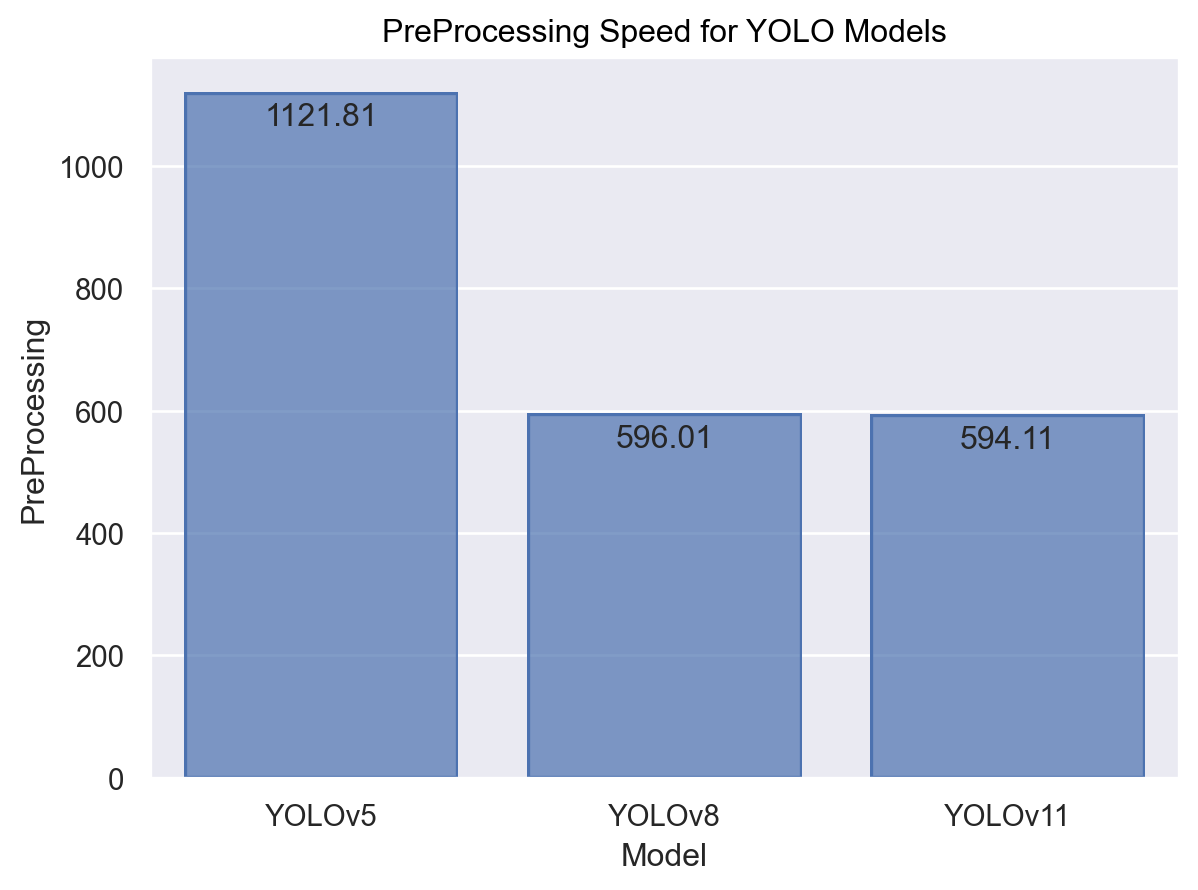

In [ ]:
#Employ Seaborn Objects to provide visualization of the preprocesing metric
(
    so.Plot(metricData,
            x='Model',
            y='PreProcessing',
            text='PreProcessing'
            
            )
    .add(so.Bar())
    .add(so.Text(valign='top'))
    .label(title='PreProcessing Speed for YOLO Models')
)

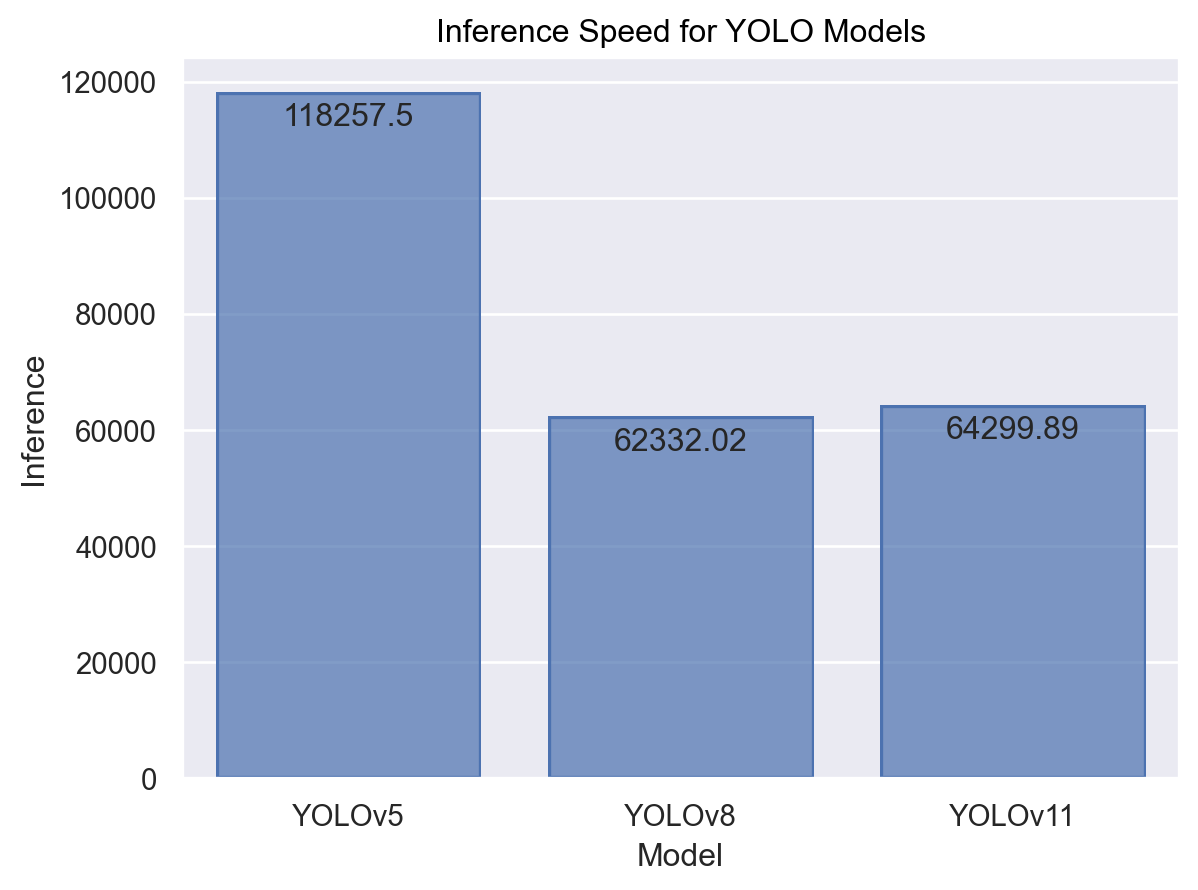

In [ ]:
#Employ Seaborn Objects to provide visualization of the inferencing metric
(
    so.Plot(metricData,
            x='Model',
            y='Inference',
            text='Inference'
            
            )
    .add(so.Bar())
    .add(so.Text(valign='top'))
    .label(title='Inference Speed for YOLO Models')
)

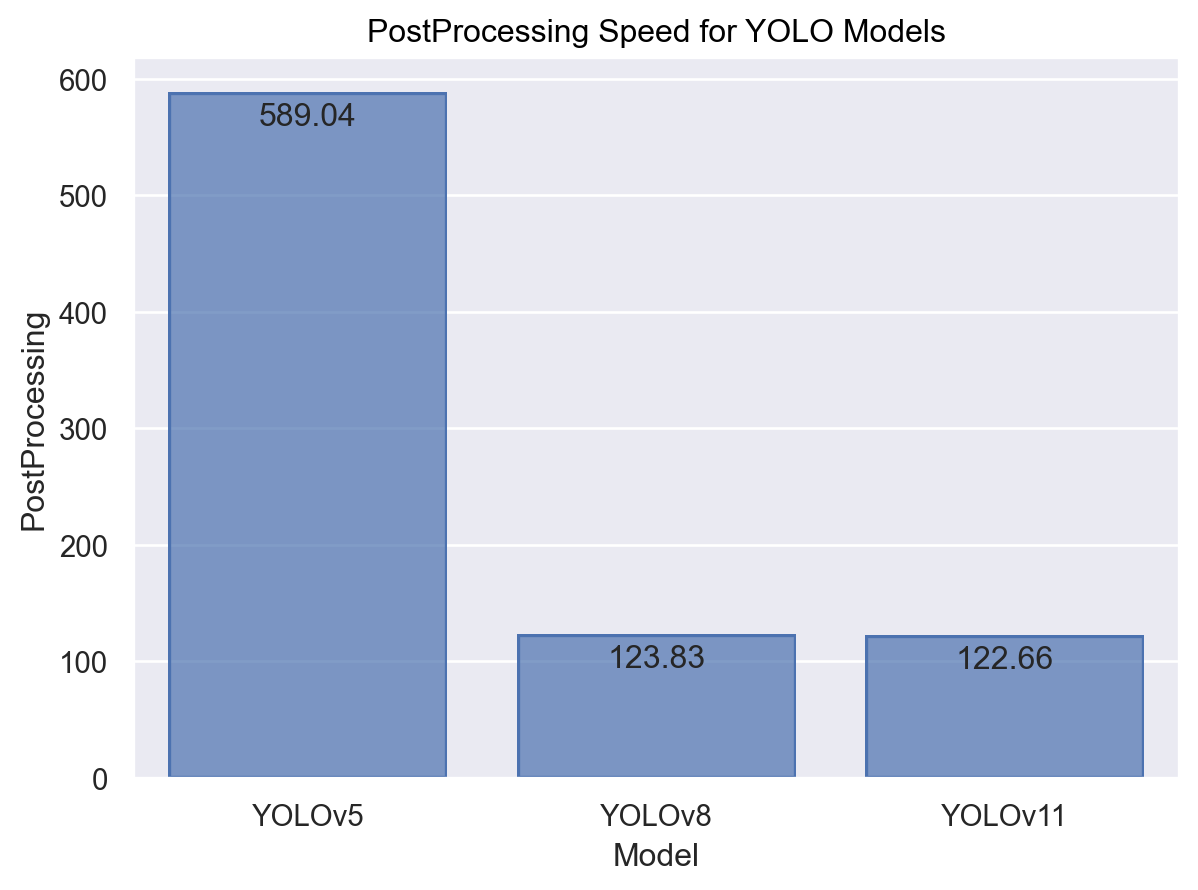

In [ ]:
#Employ Seaborn Objects to provide visualization of the postprocesing metric
(
    so.Plot(metricData,
            x='Model',
            y='PostProcessing',
            text='PostProcessing'
            
            )
    .add(so.Bar())
    .add(so.Text(valign='top'))
    .label(title='PostProcessing Speed for YOLO Models')
)